In [1]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [2]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
z = StandardScaler().fit_transform(x)
print(z)

[[-9.00681170e-01  1.03205722e+00 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00 -1.24957601e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.38535265e+00  3.37848329e-01 -1.39813811e+00 -1.31297673e+00]
 [-1.50652052e+00  1.06445364e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.02184904e+00  1.26346019e+00 -1.34127240e+00 -1.31297673e+00]
 [-5.37177559e-01  1.95766909e+00 -1.17067529e+00 -1.05003079e+00]
 [-1.50652052e+00  8.00654259e-01 -1.34127240e+00 -1.18150376e+00]
 [-1.02184904e+00  8.00654259e-01 -1.28440670e+00 -1.31297673e+00]
 [-1.74885626e+00 -3.56360566e-01 -1.34127240e+00 -1.31297673e+00]
 [-1.14301691e+00  1.06445364e-01 -1.28440670e+00 -1.44444970e+00]
 [-5.37177559e-01  1.49486315e+00 -1.28440670e+00 -1.31297673e+00]
 [-1.26418478e+00  8.00654259e-01 -1.22754100e+00 -1.31297673e+00]
 [-1.26418478e+00 -1.24957601e-01 -1.34127240e+00 -1.44444970e+00]
 [-1.87002413e+00 -1.24957601e-01 -1.51186952e+00 -1.44444970e+00]
 [-5.25060772e-02  2.18907205e+00 -1.45500381e+00 -1.31297673e

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
 , columns = ['principal component 1', 'principal component 2'])

In [7]:
print(principalDf)

     principal component 1  principal component 2
0                -2.684207               0.326607
1                -2.715391              -0.169557
2                -2.889820              -0.137346
3                -2.746437              -0.311124
4                -2.728593               0.333925
..                     ...                    ...
145               1.944017               0.187415
146               1.525664              -0.375021
147               1.764046               0.078519
148               1.901629               0.115877
149               1.389666              -0.282887

[150 rows x 2 columns]


In [8]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
print(finalDf)

     principal component 1  principal component 2          target
0                -2.684207               0.326607     Iris-setosa
1                -2.715391              -0.169557     Iris-setosa
2                -2.889820              -0.137346     Iris-setosa
3                -2.746437              -0.311124     Iris-setosa
4                -2.728593               0.333925     Iris-setosa
..                     ...                    ...             ...
145               1.944017               0.187415  Iris-virginica
146               1.525664              -0.375021  Iris-virginica
147               1.764046               0.078519  Iris-virginica
148               1.901629               0.115877  Iris-virginica
149               1.389666              -0.282887  Iris-virginica

[150 rows x 3 columns]


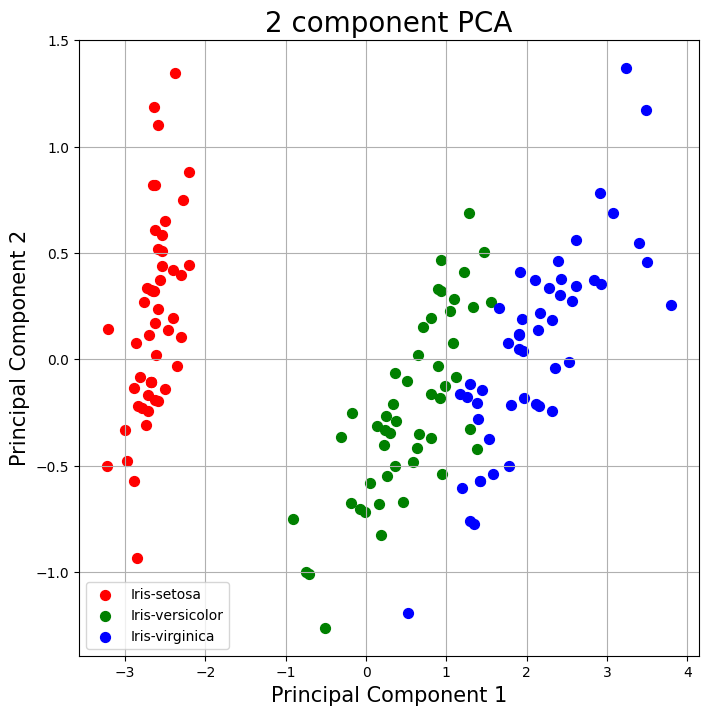

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
 indicesToKeep = finalDf['target'] == target
 ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
 , finalDf.loc[indicesToKeep, 'principal component 2']
 , c = color
 , s = 50)
ax.legend(targets)
ax.grid()

In [10]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [ ]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')
print(mnist)

In [ ]:
from sklearn.model_selection import train_test_split
# test_size: what proportion of original data is used for test set
train_img, test_img, train_lbl, test_lbl = train_test_split( mnist.data, mnist.target, test_size=1/7.0, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_img)
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95)

In [ ]:
pca.fit(train_img)

In [ ]:
train_img = pca.transform(train_img)
test_img = pca.transform(test_img)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [ ]:
logisticRegr.fit(train_img, train_lbl)

In [ ]:
logisticRegr.predict(test_img[0].reshape(1,-1))

In [ ]:
logisticRegr.predict(test_img[0:10])

In [ ]:
logisticRegr.score(test_img, test_lbl)